# Africa PD

In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
themes = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AfricaPD/main/data/themes_long.tsv?token=GHSAT0AAAAAABQWQHVY4DSH6PPJ7QKN3TKOYTCYOMQ")
themes.head()

,study_id,theme,name
0,1,Genetics,Tunisia
1,2,Genetics,Tunisia
2,3,Genetics,Algeria
3,3,Genetics,Tunisia
4,3,Genetics,Morocco


In [3]:
themes2 = themes.groupby(by = ["name", "theme"]).size().sort_values(ascending=False).reset_index(name = "count")
themes2.head()

,name,theme,count
0,South Africa,Genetics,22
1,Tunisia,Genetics,20
2,Nigeria,Clinical features,18
3,Nigeria,Genetics,9
4,Morocco,Genetics,8


In [4]:
themes2.tail()

,name,theme,count
78,Kenya,Patient engagement and QOL,1
79,Tunisia,Epidemiology,1
80,Kenya,Clinical features,1
81,Senegal,Patient engagement and QOL,1
82,Zimbabwe,Management and Access to care,1


In [5]:
countires = pd.read_table ("https://raw.githubusercontent.com/ahmedmoustafa/AfricaPD/main/data/countries.tsv?token=GHSAT0AAAAAABQWQHVYVV4IZXXV3WEEB2DMYTCYN3Q") # Reference https://developers.google.com/public-data/docs/canonical/countries_csv
countires.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
df = pd.merge (themes2, countires, on = "name", how = "left", indicator="indicator")
df.head()

,name,theme,count,country,latitude,longitude,indicator
0,South Africa,Genetics,22,ZA,-30.559482,22.937506,both
1,Tunisia,Genetics,20,TN,33.886917,9.537499,both
2,Nigeria,Clinical features,18,NG,9.081999,8.675277,both
3,Nigeria,Genetics,9,NG,9.081999,8.675277,both
4,Morocco,Genetics,8,MA,31.791702,-7.092620,both


In [7]:
df.tail()

,name,theme,count,country,latitude,longitude,indicator
78,Kenya,Patient engagement and QOL,1,KE,-0.023559,37.906193,both
79,Tunisia,Epidemiology,1,TN,33.886917,9.537499,both
80,Kenya,Clinical features,1,KE,-0.023559,37.906193,both
81,Senegal,Patient engagement and QOL,1,SN,14.497401,-14.452362,both
82,Zimbabwe,Management and Access to care,1,ZW,-19.015438,29.154857,both


In [8]:
missing = df[df["indicator"] == "left_only"]
missing

,name,theme,count,country,latitude,longitude,indicator


In [9]:
groups = df['theme'].unique()
groups

array(['Genetics', 'Clinical features', 'Epidemiology', 'Risk factors',
       'Education and Training', 'Management and Access to care',
       'Patient engagement and QOL', 'Genetics+Clinical',
       'Clinical features+Epidemiology', 'Unknown'], dtype=object)

In [10]:
len(groups)

10

In [11]:
groups2 = pd.DataFrame({'theme' : list(groups), 'color' : ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', "#000000"]})
groups2

,theme,color
0,Genetics,#e41a1c
1,Clinical features,#377eb8
2,Epidemiology,#4daf4a
3,Risk factors,#984ea3
4,Education and Training,#ff7f00
5,Management and Access to care,#ffff33
6,Patient engagement and QOL,#a65628
7,Genetics+Clinical,#f781bf
8,Clinical features+Epidemiology,#999999
9,Unknown,#000000


In [12]:
fig = go.Figure()

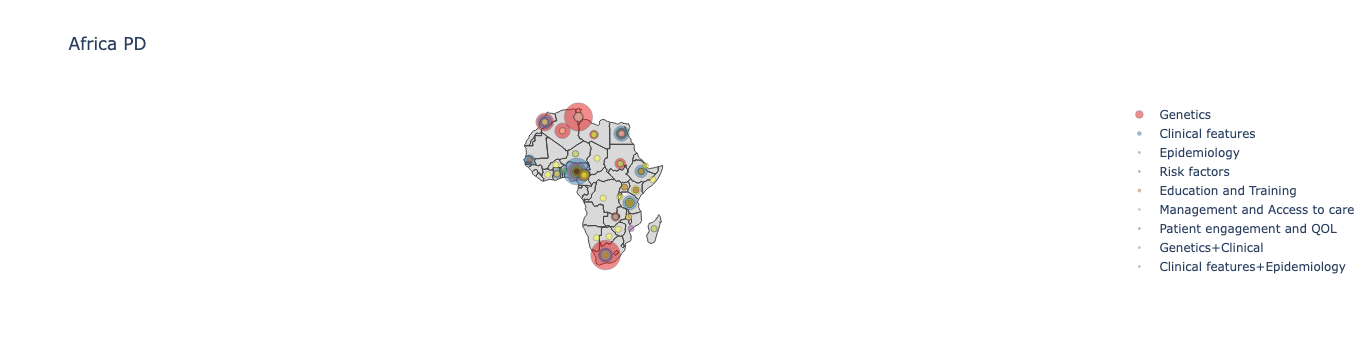

ValueError: 
The orca executable is required in order to export figures as static images,
but the executable that was found at '/bin/orca'
does not seem to be a valid plotly orca executable. Please refer to the end of
this message for details on what went wrong.

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python

Here is the error that was returned by the command
    $ /bin/orca --help

[Return code: -5]
Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(orca:8797): dbind-ERROR **: 16:41:40.595: AT-SPI: Couldn't connect to accessibility bus. Is at-spi-bus-launcher running?

Note: When used on Linux, orca requires an X11 display server, but none was
detected. Please install Xvfb and configure plotly.py to run orca using Xvfb
as follows:

    >>> import plotly.io as pio
    >>> pio.orca.config.use_xvfb = True
    
You can save this configuration for use in future sessions as follows:

    >>> pio.orca.config.save() 
    
See https://www.x.org/releases/X11R7.6/doc/man/man1/Xvfb.1.xhtml
for more info on Xvfb


In [17]:
fig = go.Figure()

for i in range(len(groups2)):

    theme = groups2.iloc[i]["theme"]
    
    color = groups2.iloc[i]["color"]
    
    sub = df[df["theme"] == theme]
    
    fig.add_trace(go.Scattergeo(
        lon = sub['longitude'],
        lat = sub['latitude'],
        text = sub['name'],
        marker = dict(
            size = sub['count'],
            color = color,
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            opacity = 0.5,
            sizeref = 0.05
        ),
        name = theme))
    
fig.update_layout(
        title_text = 'Africa PD',
        showlegend = True,
        geo = dict(
            scope = 'africa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

fig.write_image("figures/map.png")